# Logistic Regression

#### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from importlib import reload

In [4]:
reload(utils);

In [5]:
pd.set_option('display.max_columns', None)
plt.style.use('./styles.txt')

#### Index

## Introduction

*TODO*

### Loading Data

In [48]:
df_1 = pd.read_pickle('data/30k_cleaned.pkl')
df_2 = pd.read_pickle('data/large_fires_cleaned.pkl')

In [49]:
df_1.head()

,DATE,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,tempmax,avg_tempmax,temp,avg_temp,humidity,avg_humidity,precip,avg_precip,dew,avg_dew,windspeed,avg_windspeed,winddir,avg_winddir,pressure,avg_pressure,ch4,co2,n2o,tempmax_variance,temp_variance,humidity_variance,precip_variance,dew_variance,windspeed_variance,winddir_variance,pressure_variance
0,1992-01-01,1992,1,0.10,A,43.325000,-101.018500,SD,"[6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]",5.257143,"[-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]",-2.928571,"[77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]",81.142857,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,"[-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]",-6.071429,"[13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]",18.371429,"[295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]",223.500000,"[1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....",1021.671429,4.613353e-11,3.672947e-09,3.926278e-12,6.265306,3.030612,24.548163,0.000000,5.399184,47.062041,1889.074286,28.913469
2,1992-01-01,1992,1,1.00,B,33.058333,-79.979167,SC,"[10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]",13.700000,"[9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]",9.885714,"[74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]",81.428571,"[4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]",4.185714,"[5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]",6.671429,"[22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]",23.514286,"[43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]",112.142857,"[1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....",1023.357143,1.795242e-11,8.400253e-07,1.743553e-11,4.182857,0.752653,111.222041,55.589796,7.196327,5.575510,15648.559592,19.071020
3,1992-01-02,1992,2,0.25,A,40.775000,-74.854160,NJ,"[7.8, 8.0, 7.5, 6.4, 2.3, 5.0, 7.7]",6.385714,"[2.3, 1.4, 5.1, 2.7, -2.7, -1.6, 3.9]",1.585714,"[64.4, 65.8, 82.2, 67.6, 49.4, 65.1, 75.8]",67.185714,"[0.0, 0.0, 8.93, 0.83, 0.0, 0.0, 0.0]",1.394286,"[-4.0, -4.8, 2.2, -3.0, -12.2, -7.9, 0.0]",-4.242857,"[25.0, 12.2, 15.5, 29.2, 14.7, 16.1, 14.4]",18.157143,"[316.5, 260.2, 4.8, 2.4, 28.0, 259.6, 61.9]",133.342857,"[1031.2, 1029.6, 1010.7, 1018.4, 1036.6, 1035....",1027.400000,3.996876e-11,2.849724e-08,4.053962e-12,3.741224,6.858367,90.024082,9.546510,19.731020,34.516735,16492.948163,75.711429
5,1992-01-03,1992,3,1.91,B,31.018500,-83.297300,GA,"[15.1, 15.6, 9.8, 16.0, 13.2, 16.7, 14.8]",14.457143,"[14.1, 13.1, 8.1, 10.3, 10.6, 13.4, 13.2]",11.828571,"[92.0, 79.8, 75.1, 74.0, 70.7, 85.6, 75.5]",78.957143,"[21.0, 0.0, 0.0, 0.0, 0.0, 0.5, 11.3]",4.685714,"[12.8, 9.5, 3.9, 5.6, 5.4, 11.0, 8.7]",8.128571,"[16.6, 18.9, 16.3, 24.6, 24.1, 17.1, 16.8]",19.200000,"[71.4, 310.7, 321.8, 48.1, 36.4, 41.7, 295.0]",160.728571,"[1018.8, 1016.8, 1021.3, 1024.9, 1024.6, 1017....",1019.242857,4.614540e-11,7.060710e-09,2.618501e-12,4.645306,4.124898,47.791020,59.321224,9.142041,11.228571,16679.204898,21.585306
6,1992-01-03,1992,3,2.00,B,30.728900,-87.238100,FL,"[16.9, 12.6, 11.6, 14.9, 14.7, 15.9, 14.4]",14.428571,"[14.8, 10.7, 8.0, 8.3, 12.0, 12.7, 10.4]",10.985714,"[92.5, 81.2, 74.7, 78.2, 73.3, 85.2, 74.7]",79.971429,"[1.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.188571,"[13.6, 7.6, 3.7, 4.4, 7.3, 10.2, 5.7]",7.500000,"[20.5, 15.5, 17.7, 11.7, 16.0, 10.4, 27.2]",17.000000,"[347.8, 318.8, 359.2, 42.9, 66.7, 58.0, 323.0]",216.628571,"[1016.6, 1019.2, 1022.7, 1024.3, 1023.4, 1017....",1019.671429,9.516179e-12,3.579336e-09,1.213336e-12,2.844898,5.009796,41.290612,0.213355,10.262857,27.382857,19587.093469,13.107755


In [50]:
df_2.head()

,index,DATE,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,tempmax,avg_tempmax,temp,avg_temp,humidity,avg_humidity,precip,avg_precip,dew,avg_dew,windspeed,avg_windspeed,winddir,avg_winddir,pressure,avg_pressure,ch4,co2,n2o,tempmax_variance,temp_variance,humidity_variance,precip_variance,dew_variance,windspeed_variance,winddir_variance,pressure_variance
0,1059593,2003-04-14,2003,104,232.0,D,41.363889,-88.173056,IL,"[0.7, 6.1, 13.6, 20.6, 9.4, 19.0, 29.0]",14.057143,"[0.2, 2.4, 6.8, 10.6, 6.6, 9.7, 19.8]",8.014286,"[84.1, 66.9, 46.4, 38.8, 55.6, 56.6, 35.8]",54.885714,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,"[-2.1, -3.4, -5.8, -3.7, -1.8, 0.6, 3.4]",-1.828571,"[22.9, 22.0, 14.8, 22.3, 27.7, 20.5, 34.2]",23.485714,"[38.5, 31.8, 76.8, 14.3, 29.4, 154.8, 199.4]",77.857143,"[1026.7, 1026.2, 1021.9, 1014.9, 1019.4, 1023....",1021.328571,9.967485e-11,2.751741e-08,9.263724e-12,79.165306,34.926939,242.326939,0.000000,7.864898,31.552653,4393.119592,16.827755
1,780956,1992-02-21,1992,52,150.0,D,34.587299,-95.611298,OK,"[17.9, 17.2, 20.1, 16.7, 16.2, 20.7, 21.2]",18.571429,"[10.5, 10.5, 14.4, 10.0, 8.0, 12.0, 15.0]",11.485714,"[65.9, 64.0, 52.6, 54.7, 55.1, 40.5, 38.8]",53.085714,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,"[3.6, 3.2, 3.5, 0.5, -1.6, -2.3, 0.6]",1.071429,"[22.3, 24.1, 33.5, 29.5, 24.1, 27.7, 25.9]",26.728571,"[334.6, 129.6, 197.4, 288.6, 320.2, 181.3, 173.9]",232.228571,"[1012.9, 1014.8, 1006.8, 1014.8, 1023.7, 1021....",1016.271429,2.820779e-11,1.685158e-09,1.506214e-12,3.604898,5.344082,93.244082,0.000000,5.124898,12.656327,5591.173469,28.450612
2,1358818,2010-06-15,2010,166,277.0,D,27.001200,-81.436200,FL,"[32.5, 32.8, 35.1, 35.2, 33.4, 33.8, 34.0]",33.828571,"[26.6, 26.9, 28.4, 28.0, 27.0, 27.4, 28.3]",27.514286,"[74.2, 69.4, 72.7, 73.6, 81.8, 80.3, 78.3]",75.757143,"[0.0, 0.0, 0.0, 0.15, 2.19, 0.04, 0.25]",0.375714,"[20.9, 19.8, 22.4, 22.1, 23.4, 23.3, 23.7]",22.228571,"[20.5, 14.2, 16.3, 18.4, 13.9, 22.3, 16.3]",17.414286,"[73.1, 35.5, 44.9, 72.4, 51.0, 267.8, 7.2]",78.842857,"[1017.7, 1017.0, 1017.9, 1018.8, 1017.5, 1016....",1017.457143,7.241625e-11,4.184836e-09,2.445356e-12,0.933469,0.446939,17.208163,0.556367,1.770612,8.504082,6388.276735,0.568163
3,714311,1992-04-29,1992,120,125.0,D,45.966667,-68.466668,ME,"[3.8, 4.4, 3.9, 5.7, 12.9, 13.9, 16.7]",8.757143,"[1.7, 1.7, 1.0, 0.6, 5.1, 5.4, 9.1]",3.514286,"[93.4, 85.7, 81.3, 61.8, 37.1, 44.4, 33.9]",62.514286,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,"[0.7, -0.5, -1.9, -6.4, -9.0, -7.4, -6.5]",-4.428571,"[16.6, 27.7, 22.3, 27.7, 27.7, 25.9, 29.5]",25.342857,"[57.0, 85.0, 46.3, 31.2, 26.4, 191.6, 198.8]",90.900000,"[1018.0, 1015.1, 1012.7, 1012.6, 1013.1, 1017....",1014.914286,8.259238e-12,4.874638e-09,1.488044e-12,26.171020,8.381224,519.672653,0.000000,12.290612,17.136735,4668.631429,4.495510
4,1506649,2011-03-12,2011,71,285.0,D,36.279960,-93.945460,AR,"[11.0, 11.6, 11.8, 7.7, 10.8, 20.0, 21.4]",13.471429,"[2.8, 6.2, 8.7, 3.8, 3.7, 10.7, 14.6]",7.214286,"[70.0, 57.3, 90.0, 85.5, 62.6, 44.7, 39.8]",64.271429,"[0.0, 0.0, 1.24, 0.0, 0.0, 0.0, 0.0]",0.177143,"[-3.0, -2.2, 7.1, 1.5, -3.6, -2.5, 0.8]",-0.271429,"[18.4, 23.0, 25.2, 31.8, 21.9, 39.1, 20.6]",25.714286,"[98.3, 123.6, 125.9, 299.1, 310.3, 186.3, 58.8]",171.757143,"[1022.4, 1015.2, 1009.3, 1017.6, 1026.3, 1018....",1017.971429,2.110244e-10,6.198390e-09,3.427687e-12,22.619184,16.204082,311.244898,0.188278,12.262041,45.435510,8314.153878,24.979184


In [51]:
# Check that the shapes match
df_1.shape[1] == df_2.shape[1] 

False

In [52]:
# Drop index column
df_2.drop('index', axis=1, inplace=True)

In [53]:
# Check that the shapes match
df_1.shape[1] == df_2.shape[1] 

True

In [54]:
df = pd.concat([df_1, df_2])

In [55]:
df.shape

(29734, 35)

In [56]:
# Check that they were added
df.shape[0] == df_1.shape[0] + df_2.shape[0]

True

In [57]:
df.head(2)

,DATE,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,tempmax,avg_tempmax,temp,avg_temp,humidity,avg_humidity,precip,avg_precip,dew,avg_dew,windspeed,avg_windspeed,winddir,avg_winddir,pressure,avg_pressure,ch4,co2,n2o,tempmax_variance,temp_variance,humidity_variance,precip_variance,dew_variance,windspeed_variance,winddir_variance,pressure_variance
0,1992-01-01,1992,1,0.1,A,43.325000,-101.018500,SD,"[6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]",5.257143,"[-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]",-2.928571,"[77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]",81.142857,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,"[-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]",-6.071429,"[13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]",18.371429,"[295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]",223.500000,"[1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....",1021.671429,4.613353e-11,3.672947e-09,3.926278e-12,6.265306,3.030612,24.548163,0.000000,5.399184,47.062041,1889.074286,28.913469
2,1992-01-01,1992,1,1.0,B,33.058333,-79.979167,SC,"[10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]",13.700000,"[9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]",9.885714,"[74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]",81.428571,"[4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]",4.185714,"[5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]",6.671429,"[22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]",23.514286,"[43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]",112.142857,"[1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....",1023.357143,1.795242e-11,8.400253e-07,1.743553e-11,4.182857,0.752653,111.222041,55.589796,7.196327,5.575510,15648.559592,19.071020


In [58]:
df.reset_index(drop=True, inplace=True)

In [59]:
df.head()

,DATE,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,tempmax,avg_tempmax,temp,avg_temp,humidity,avg_humidity,precip,avg_precip,dew,avg_dew,windspeed,avg_windspeed,winddir,avg_winddir,pressure,avg_pressure,ch4,co2,n2o,tempmax_variance,temp_variance,humidity_variance,precip_variance,dew_variance,windspeed_variance,winddir_variance,pressure_variance
0,1992-01-01,1992,1,0.10,A,43.325000,-101.018500,SD,"[6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]",5.257143,"[-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]",-2.928571,"[77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]",81.142857,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,"[-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]",-6.071429,"[13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]",18.371429,"[295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]",223.500000,"[1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....",1021.671429,4.613353e-11,3.672947e-09,3.926278e-12,6.265306,3.030612,24.548163,0.000000,5.399184,47.062041,1889.074286,28.913469
1,1992-01-01,1992,1,1.00,B,33.058333,-79.979167,SC,"[10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]",13.700000,"[9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]",9.885714,"[74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]",81.428571,"[4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]",4.185714,"[5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]",6.671429,"[22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]",23.514286,"[43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]",112.142857,"[1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....",1023.357143,1.795242e-11,8.400253e-07,1.743553e-11,4.182857,0.752653,111.222041,55.589796,7.196327,5.575510,15648.559592,19.071020
2,1992-01-02,1992,2,0.25,A,40.775000,-74.854160,NJ,"[7.8, 8.0, 7.5, 6.4, 2.3, 5.0, 7.7]",6.385714,"[2.3, 1.4, 5.1, 2.7, -2.7, -1.6, 3.9]",1.585714,"[64.4, 65.8, 82.2, 67.6, 49.4, 65.1, 75.8]",67.185714,"[0.0, 0.0, 8.93, 0.83, 0.0, 0.0, 0.0]",1.394286,"[-4.0, -4.8, 2.2, -3.0, -12.2, -7.9, 0.0]",-4.242857,"[25.0, 12.2, 15.5, 29.2, 14.7, 16.1, 14.4]",18.157143,"[316.5, 260.2, 4.8, 2.4, 28.0, 259.6, 61.9]",133.342857,"[1031.2, 1029.6, 1010.7, 1018.4, 1036.6, 1035....",1027.400000,3.996876e-11,2.849724e-08,4.053962e-12,3.741224,6.858367,90.024082,9.546510,19.731020,34.516735,16492.948163,75.711429
3,1992-01-03,1992,3,1.91,B,31.018500,-83.297300,GA,"[15.1, 15.6, 9.8, 16.0, 13.2, 16.7, 14.8]",14.457143,"[14.1, 13.1, 8.1, 10.3, 10.6, 13.4, 13.2]",11.828571,"[92.0, 79.8, 75.1, 74.0, 70.7, 85.6, 75.5]",78.957143,"[21.0, 0.0, 0.0, 0.0, 0.0, 0.5, 11.3]",4.685714,"[12.8, 9.5, 3.9, 5.6, 5.4, 11.0, 8.7]",8.128571,"[16.6, 18.9, 16.3, 24.6, 24.1, 17.1, 16.8]",19.200000,"[71.4, 310.7, 321.8, 48.1, 36.4, 41.7, 295.0]",160.728571,"[1018.8, 1016.8, 1021.3, 1024.9, 1024.6, 1017....",1019.242857,4.614540e-11,7.060710e-09,2.618501e-12,4.645306,4.124898,47.791020,59.321224,9.142041,11.228571,16679.204898,21.585306
4,1992-01-03,1992,3,2.00,B,30.728900,-87.238100,FL,"[16.9, 12.6, 11.6, 14.9, 14.7, 15.9, 14.4]",14.428571,"[14.8, 10.7, 8.0, 8.3, 12.0, 12.7, 10.4]",10.985714,"[92.5, 81.2, 74.7, 78.2, 73.3, 85.2, 74.7]",79.971429,"[1.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.188571,"[13.6, 7.6, 3.7, 4.4, 7.3, 10.2, 5.7]",7.500000,"[20.5, 15.5, 17.7, 11.7, 16.0, 10.4, 27.2]",17.000000,"[347.8, 318.8, 359.2, 42.9, 66.7, 58.0, 323.0]",216.628571,"[1016.6, 1019.2, 1022.7, 1024.3, 1023.4, 1017....",1019.671429,9.516179e-12,3.579336e-09,1.213336e-12,2.844898,5.009796,41.290612,0.213355,10.262857,27.382857,19587.093469,13.107755


### Preparation for Logistic Regression

If we are creating a logistic regression model we want to ensure that we have a fairly even split between our samples. 

In [60]:
utils.count_percentage_df(df['FIRE_SIZE_CLASS'])

,Count,Percentage of Total
B,10529,0.354106
A,7355,0.247360
D,2728,0.091747
E,2494,0.083877
C,2441,0.082095
F,2222,0.074729
G,1965,0.066086


This is far better than the distribution we had previously, where `FIRE_SIZE_CLASS` G only accounted for 0.1% of our entire data.

## Preprocessing

In [61]:
numeric_df = df.select_dtypes('number').copy()
categorical_df = df.select_dtypes('object').copy()

In [62]:
print("Numeric columns: \n", ',\n '.join(numeric_df.columns))
print("Categorical columns: \n", ', \n '.join(categorical_df.columns))

Numeric columns: 
 FIRE_YEAR,
 DISCOVERY_DOY,
 FIRE_SIZE,
 LATITUDE,
 LONGITUDE,
 avg_tempmax,
 avg_temp,
 avg_humidity,
 avg_precip,
 avg_dew,
 avg_windspeed,
 avg_winddir,
 avg_pressure,
 ch4,
 co2,
 n2o,
 tempmax_variance,
 temp_variance,
 humidity_variance,
 precip_variance,
 dew_variance,
 windspeed_variance,
 winddir_variance,
 pressure_variance
Categorical columns: 
 FIRE_SIZE_CLASS, 
 STATE, 
 tempmax, 
 temp, 
 humidity, 
 precip, 
 dew, 
 windspeed, 
 winddir, 
 pressure


In [63]:
numeric_df.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,avg_tempmax,avg_temp,avg_humidity,avg_precip,avg_dew,avg_windspeed,avg_winddir,avg_pressure,ch4,co2,n2o,tempmax_variance,temp_variance,humidity_variance,precip_variance,dew_variance,windspeed_variance,winddir_variance,pressure_variance
0,1992,1,0.10,43.325000,-101.018500,5.257143,-2.928571,81.142857,0.000000,-6.071429,18.371429,223.500000,1021.671429,4.613353e-11,3.672947e-09,3.926278e-12,6.265306,3.030612,24.548163,0.000000,5.399184,47.062041,1889.074286,28.913469
1,1992,1,1.00,33.058333,-79.979167,13.700000,9.885714,81.428571,4.185714,6.671429,23.514286,112.142857,1023.357143,1.795242e-11,8.400253e-07,1.743553e-11,4.182857,0.752653,111.222041,55.589796,7.196327,5.575510,15648.559592,19.071020
2,1992,2,0.25,40.775000,-74.854160,6.385714,1.585714,67.185714,1.394286,-4.242857,18.157143,133.342857,1027.400000,3.996876e-11,2.849724e-08,4.053962e-12,3.741224,6.858367,90.024082,9.546510,19.731020,34.516735,16492.948163,75.711429
3,1992,3,1.91,31.018500,-83.297300,14.457143,11.828571,78.957143,4.685714,8.128571,19.200000,160.728571,1019.242857,4.614540e-11,7.060710e-09,2.618501e-12,4.645306,4.124898,47.791020,59.321224,9.142041,11.228571,16679.204898,21.585306
4,1992,3,2.00,30.728900,-87.238100,14.428571,10.985714,79.971429,0.188571,7.500000,17.000000,216.628571,1019.671429,9.516179e-12,3.579336e-09,1.213336e-12,2.844898,5.009796,41.290612,0.213355,10.262857,27.382857,19587.093469,13.107755


In [64]:
categorical_df.head(2)

,FIRE_SIZE_CLASS,STATE,tempmax,temp,humidity,precip,dew,windspeed,winddir,pressure
0,A,SD,"[6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]","[-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]","[77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]","[13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]","[295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]","[1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024...."
1,B,SC,"[10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]","[9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]","[74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]","[4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]","[5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]","[22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]","[43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]","[1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028...."


### Preprocessing Categorical Data

In [65]:
categorical_df[['FIRE_SIZE_CLASS', 'STATE']].nunique().sort_values()

FIRE_SIZE_CLASS     7
STATE              52
dtype: int64

#### Processing `STATE`

While previously we decided to numerically encode the `FIRE_SIZE_CLASS`, in this model we will use it as our target variable, meaning that we do not need to process this column. Instead we will solely focus on encoding the `STATE` column using `pd.getdummies()`.

In [66]:
state_dummies = pd.get_dummies(categorical_df['STATE'], prefix='state')

In [67]:
state_dummies.head()

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_PR,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
df = pd.concat([df, state_dummies], axis=1)

In [69]:
df.head(2)

,DATE,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,tempmax,avg_tempmax,temp,avg_temp,humidity,avg_humidity,precip,avg_precip,dew,avg_dew,windspeed,avg_windspeed,winddir,avg_winddir,pressure,avg_pressure,ch4,co2,n2o,tempmax_variance,temp_variance,humidity_variance,precip_variance,dew_variance,windspeed_variance,winddir_variance,pressure_variance,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_PR,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1992-01-01,1992,1,0.1,A,43.325000,-101.018500,SD,"[6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]",5.257143,"[-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]",-2.928571,"[77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]",81.142857,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,"[-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]",-6.071429,"[13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]",18.371429,"[295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]",223.500000,"[1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....",1021.671429,4.613353e-11,3.672947e-09,3.926278e-12,6.265306,3.030612,24.548163,0.000000,5.399184,47.062041,1889.074286,28.913469,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1992-01-01,1992,1,1.0,B,33.058333,-79.979167,SC,"[10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]",13.700000,"[9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]",9.885714,"[74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]",81.428571,"[4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]",4.185714,"[5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]",6.671429,"[22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]",23.514286,"[43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]",112.142857,"[1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....",1023.357143,1.795242e-11,8.400253e-07,1.743553e-11,4.182857,0.752653,111.222041,55.589796,7.196327,5.575510,15648.559592,19.071020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [70]:
df.drop('STATE', axis=1, inplace=True)

In [71]:
df.head(2)

,DATE,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,tempmax,avg_tempmax,temp,avg_temp,humidity,avg_humidity,precip,avg_precip,dew,avg_dew,windspeed,avg_windspeed,winddir,avg_winddir,pressure,avg_pressure,ch4,co2,n2o,tempmax_variance,temp_variance,humidity_variance,precip_variance,dew_variance,windspeed_variance,winddir_variance,pressure_variance,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_PR,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1992-01-01,1992,1,0.1,A,43.325000,-101.018500,"[6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]",5.257143,"[-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]",-2.928571,"[77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]",81.142857,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,"[-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]",-6.071429,"[13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]",18.371429,"[295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]",223.500000,"[1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....",1021.671429,4.613353e-11,3.672947e-09,3.926278e-12,6.265306,3.030612,24.548163,0.000000,5.399184,47.062041,1889.074286,28.913469,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1992-01-01,1992,1,1.0,B,33.058333,-79.979167,"[10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]",13.700000,"[9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]",9.885714,"[74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]",81.428571,"[4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]",4.185714,"[5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]",6.671429,"[22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]",23.514286,"[43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]",112.142857,"[1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....",1023.357143,1.795242e-11,8.400253e-07,1.743553e-11,4.182857,0.752653,111.222041,55.589796,7.196327,5.575510,15648.559592,19.071020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Processing Numerical Columns

In [72]:
numeric_df.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,avg_tempmax,avg_temp,avg_humidity,avg_precip,avg_dew,avg_windspeed,avg_winddir,avg_pressure,ch4,co2,n2o,tempmax_variance,temp_variance,humidity_variance,precip_variance,dew_variance,windspeed_variance,winddir_variance,pressure_variance
0,1992,1,0.10,43.325000,-101.018500,5.257143,-2.928571,81.142857,0.000000,-6.071429,18.371429,223.500000,1021.671429,4.613353e-11,3.672947e-09,3.926278e-12,6.265306,3.030612,24.548163,0.000000,5.399184,47.062041,1889.074286,28.913469
1,1992,1,1.00,33.058333,-79.979167,13.700000,9.885714,81.428571,4.185714,6.671429,23.514286,112.142857,1023.357143,1.795242e-11,8.400253e-07,1.743553e-11,4.182857,0.752653,111.222041,55.589796,7.196327,5.575510,15648.559592,19.071020
2,1992,2,0.25,40.775000,-74.854160,6.385714,1.585714,67.185714,1.394286,-4.242857,18.157143,133.342857,1027.400000,3.996876e-11,2.849724e-08,4.053962e-12,3.741224,6.858367,90.024082,9.546510,19.731020,34.516735,16492.948163,75.711429
3,1992,3,1.91,31.018500,-83.297300,14.457143,11.828571,78.957143,4.685714,8.128571,19.200000,160.728571,1019.242857,4.614540e-11,7.060710e-09,2.618501e-12,4.645306,4.124898,47.791020,59.321224,9.142041,11.228571,16679.204898,21.585306
4,1992,3,2.00,30.728900,-87.238100,14.428571,10.985714,79.971429,0.188571,7.500000,17.000000,216.628571,1019.671429,9.516179e-12,3.579336e-09,1.213336e-12,2.844898,5.009796,41.290612,0.213355,10.262857,27.382857,19587.093469,13.107755


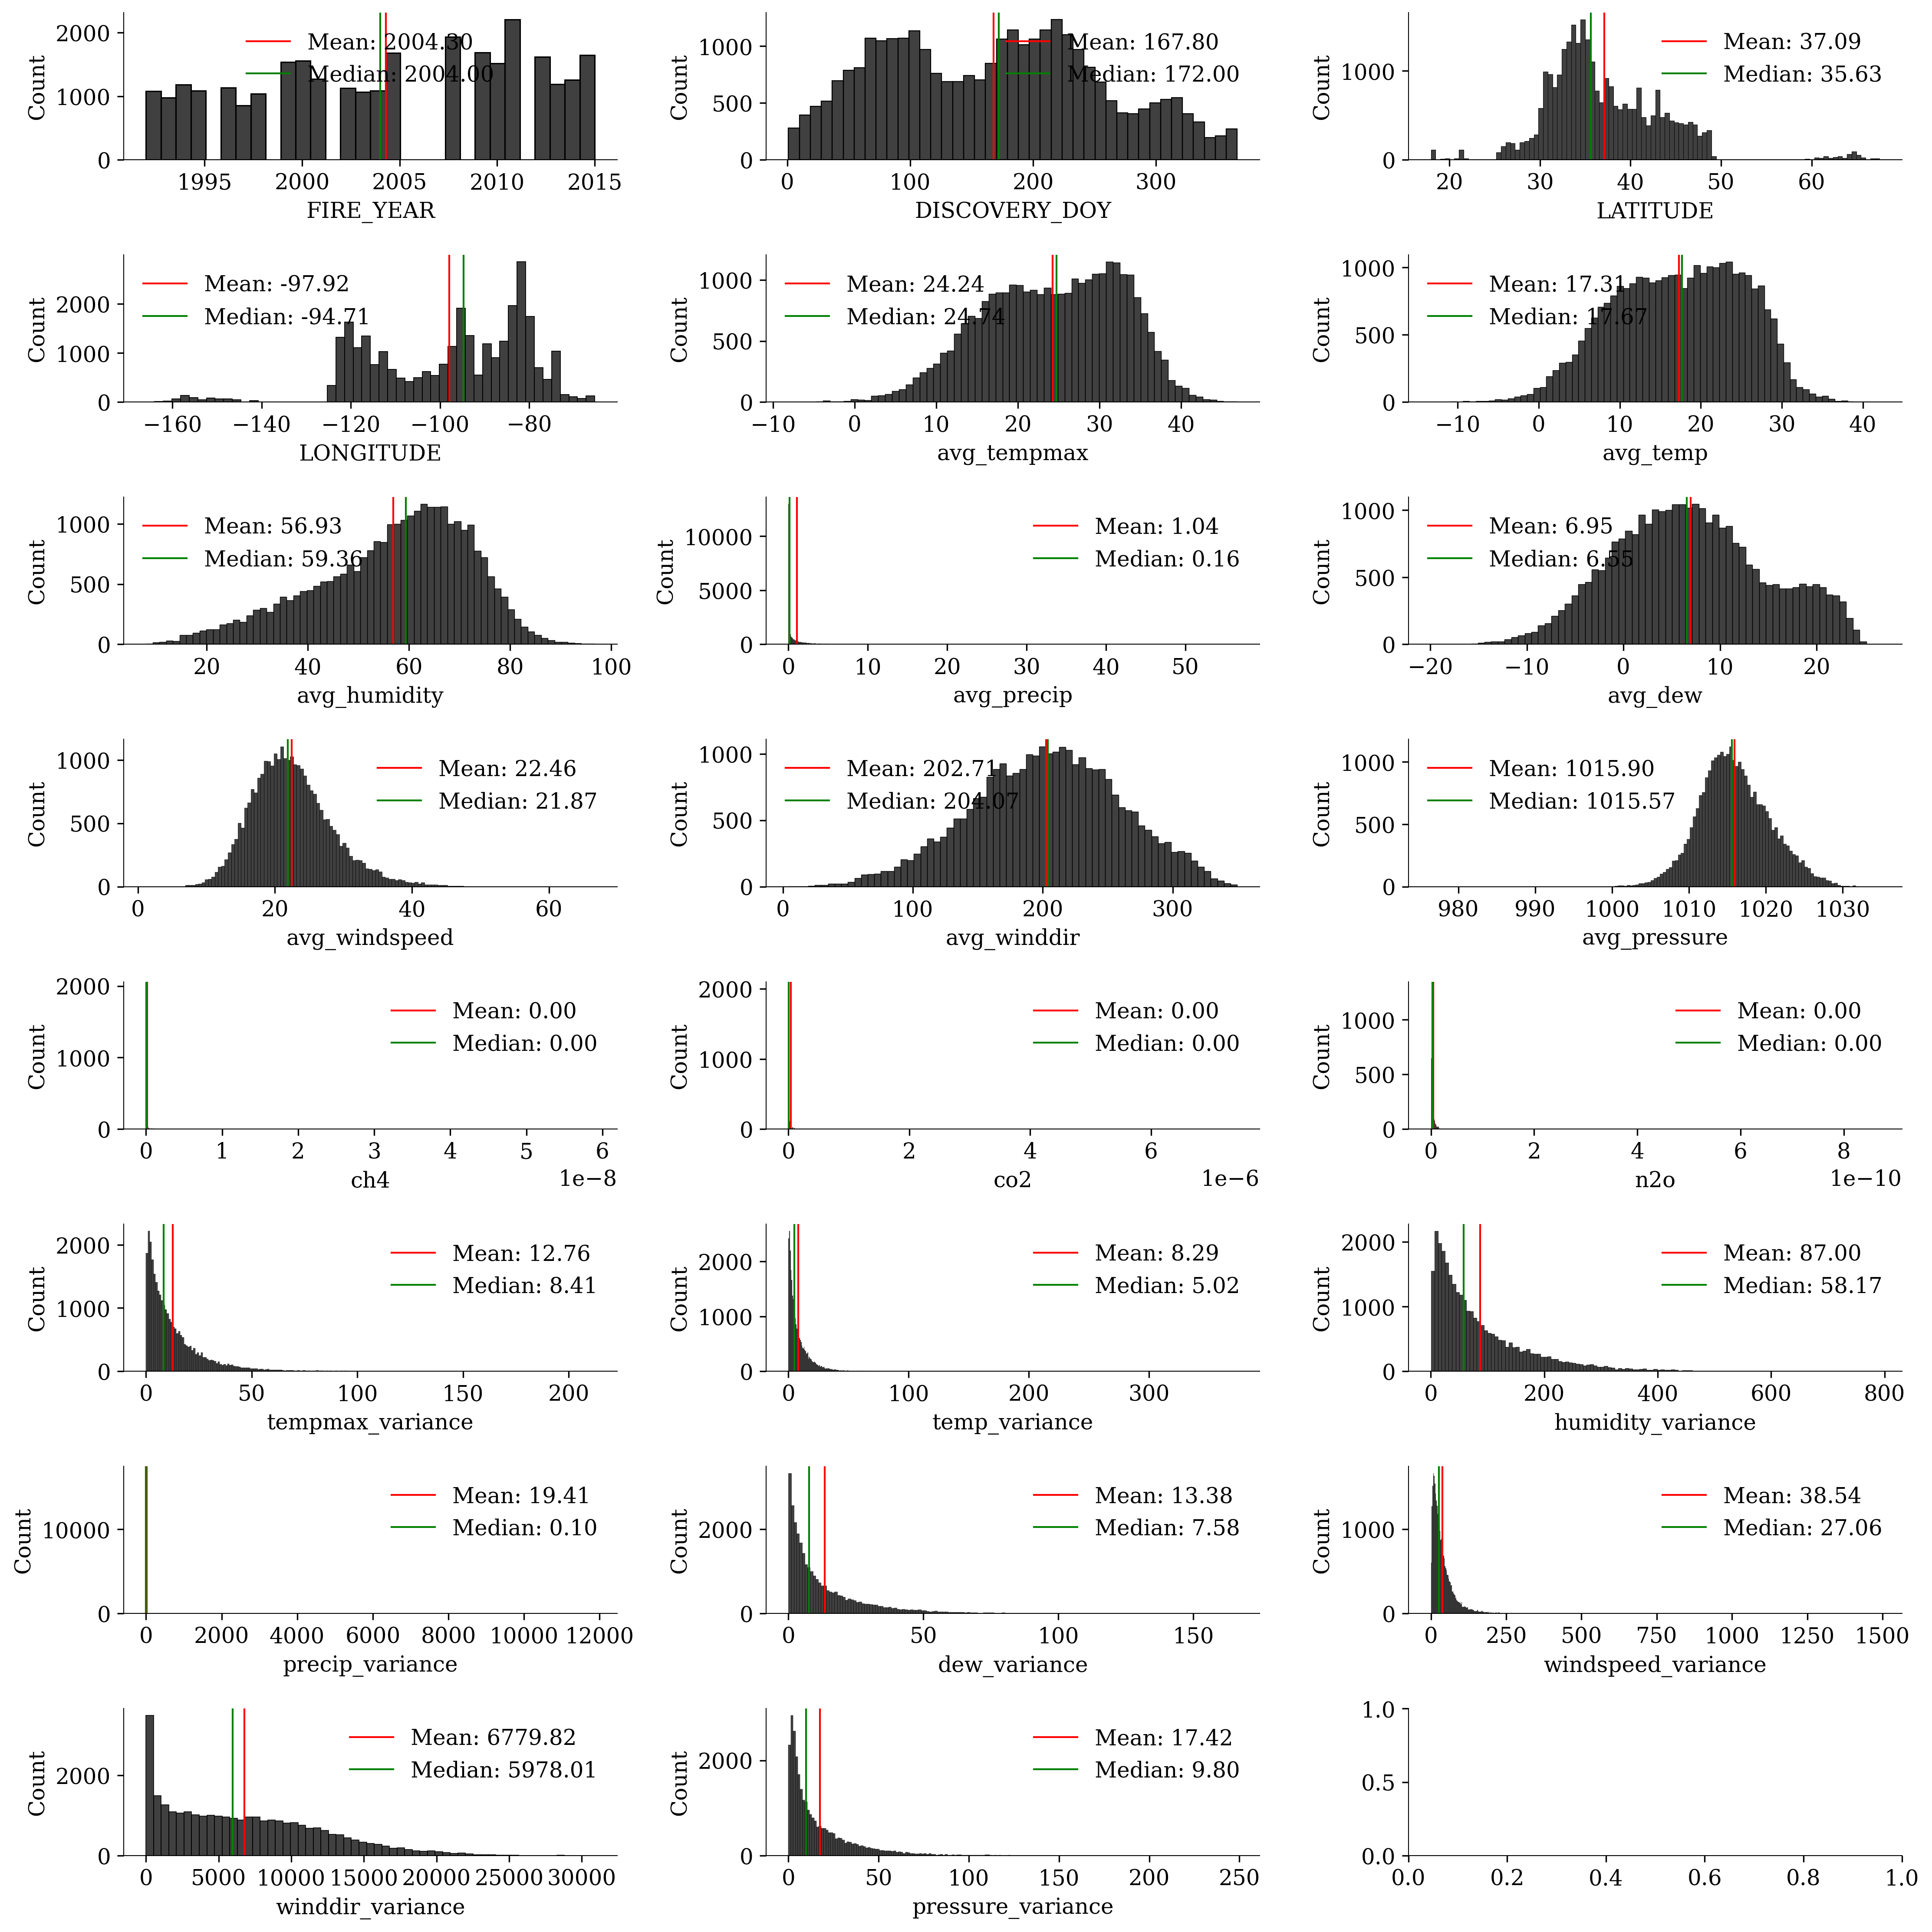

In [73]:
utils.HistogramSubplots(numeric_df.drop('FIRE_SIZE', axis=1))

In [107]:
from scipy.stats import boxcox

boxcox_cols = [col for col in numeric_df.columns
               if 'variance' in col]

boxcox_cols.remove('precip_variance')

for col in boxcox_cols:
    name = f'boxcox_{col}'
    df[name] = boxcox(df[col])[0]

In [110]:
df.head(2)

,DATE,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,tempmax,avg_tempmax,temp,avg_temp,humidity,avg_humidity,precip,avg_precip,dew,avg_dew,windspeed,avg_windspeed,winddir,avg_winddir,pressure,avg_pressure,ch4,co2,n2o,tempmax_variance,temp_variance,humidity_variance,precip_variance,dew_variance,windspeed_variance,winddir_variance,pressure_variance,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_PR,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,boxcox_tempmax_variance,boxcox_temp_variance,boxcox_humidity_variance,boxcox_dew_variance,boxcox_windspeed_variance,boxcox_winddir_variance,boxcox_pressure_variance
0,1992-01-01,1992,1,0.1,A,43.325000,-101.018500,"[6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]",5.257143,"[-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]",-2.928571,"[77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]",81.142857,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,"[-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]",-6.071429,"[13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]",18.371429,"[295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]",223.500000,"[1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....",1021.671429,4.613353e-11,3.672947e-09,3.926278e-12,6.265306,3.030612,24.548163,0.000000,5.399184,47.062041,1889.074286,28.913469,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.208106,1.222298,4.438154,1.969620,5.226522,63.723124,4.150127
1,1992-01-01,1992,1,1.0,B,33.058333,-79.979167,"[10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]",13.700000,"[9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]",9.885714,"[74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]",81.428571,"[4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]",4.185714,"[5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]",6.671429,"[22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]",23.514286,"[43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]",112.142857,"[1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....",1023.357143,1.795242e-11,8.400253e-07,1.743553e-11,4.182857,0.752653,111.222041,55.589796,7.196327,5.575510,15648.559592,19.071020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.651649,-0.277277,7.707836,2.368858,1.962302,168.249044,3.540947


In [111]:
df.drop(boxcox_cols, axis=1, inplace=True)

In [115]:
df.head(2)

,DATE,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,tempmax,avg_tempmax,temp,avg_temp,humidity,avg_humidity,precip,avg_precip,dew,avg_dew,windspeed,avg_windspeed,winddir,avg_winddir,pressure,avg_pressure,ch4,co2,n2o,precip_variance,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_PR,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,boxcox_tempmax_variance,boxcox_temp_variance,boxcox_humidity_variance,boxcox_dew_variance,boxcox_windspeed_variance,boxcox_winddir_variance,boxcox_pressure_variance
0,1992-01-01,1992,1,0.1,A,43.325000,-101.018500,"[6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]",5.257143,"[-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]",-2.928571,"[77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]",81.142857,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,"[-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]",-6.071429,"[13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]",18.371429,"[295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]",223.500000,"[1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....",1021.671429,4.613353e-11,3.672947e-09,3.926278e-12,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.208106,1.222298,4.438154,1.969620,5.226522,63.723124,4.150127
1,1992-01-01,1992,1,1.0,B,33.058333,-79.979167,"[10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]",13.700000,"[9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]",9.885714,"[74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]",81.428571,"[4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]",4.185714,"[5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]",6.671429,"[22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]",23.514286,"[43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]",112.142857,"[1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....",1023.357143,1.795242e-11,8.400253e-07,1.743553e-11,55.589796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.651649,-0.277277,7.707836,2.368858,1.962302,168.249044,3.540947


## Logistic Regression Model

To begin, we want to get an even amount of samples from each.

In [116]:
df_condensed = pd.DataFrame()

fire_classes = df['FIRE_SIZE_CLASS'].unique()

for fire_class in fire_classes:
    tmp = df[df['FIRE_SIZE_CLASS'] == fire_class]
    df_condensed = pd.concat([df_condensed, tmp.sample(1965)])

In [117]:
df_condensed.shape

(13755, 86)

In [118]:
utils.count_percentage_df(df_condensed['FIRE_SIZE_CLASS'])

,Count,Percentage of Total
A,1965,0.142857
B,1965,0.142857
C,1965,0.142857
D,1965,0.142857
E,1965,0.142857
F,1965,0.142857
G,1965,0.142857


In [119]:
from sklearn.model_selection import train_test_split

X = df_condensed.select_dtypes('number').drop('FIRE_SIZE', axis=1)
y = df_condensed['FIRE_SIZE_CLASS']

# Create remainder and test
X_rem, X_test, y_rem, y_test = \
train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Create train and validation
X_train, X_validation, y_train, y_validation = \
train_test_split(X_rem, y_rem, test_size=0.3, random_state=1, stratify=y_rem)

In [120]:
robust_cols = ['precip_variance', 'ch4', 'n2o', 'co2']
minmax_cols = ['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE']
state_cols = [col for col in X_train.columns
              if 'state' in col]
ss_cols = [col for col in X_train.columns
           if col not in robust_cols
           if col not in minmax_cols
           if col not in state_cols]

In [121]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Create column transformation list
col_transforms = [('standard scale', StandardScaler(), ss_cols),
                  ('minmax scale', MinMaxScaler(), minmax_cols), 
                  ('robust scale', RobustScaler(), robust_cols)]

# Create the column transformer
col_transformer = ColumnTransformer(col_transforms)

# Fit to X_train
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('standard scale', StandardScaler(),
                                 ['avg_tempmax', 'avg_temp', 'avg_humidity',
                                  'avg_precip', 'avg_dew', 'avg_windspeed',
                                  'avg_winddir', 'avg_pressure',
                                  'boxcox_tempmax_variance',
                                  'boxcox_temp_variance',
                                  'boxcox_humidity_variance',
                                  'boxcox_dew_variance',
                                  'boxcox_windspeed_variance',
                                  'boxcox_winddir_variance',
                                  'boxcox_pressure_variance']),
                                ('minmax scale', MinMaxScaler(),
                                 ['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE',
                                  'LONGITUDE']),
                                ('robust scale', RobustScaler(),
                                

In [122]:
X_train_transformed = col_transformer.transform(X_train)
X_validation_transformed = col_transformer.transform(X_validation)

In [129]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_transformed, y_train)

LogisticRegression(max_iter=10000)

In [130]:
logreg.score(X_validation_transformed, y_validation)

0.2704421562689279

In [131]:
X_test_transformed =  col_transformer.transform(X_test)
logreg.score(X_test_transformed, y_test)

0.2875318066157761

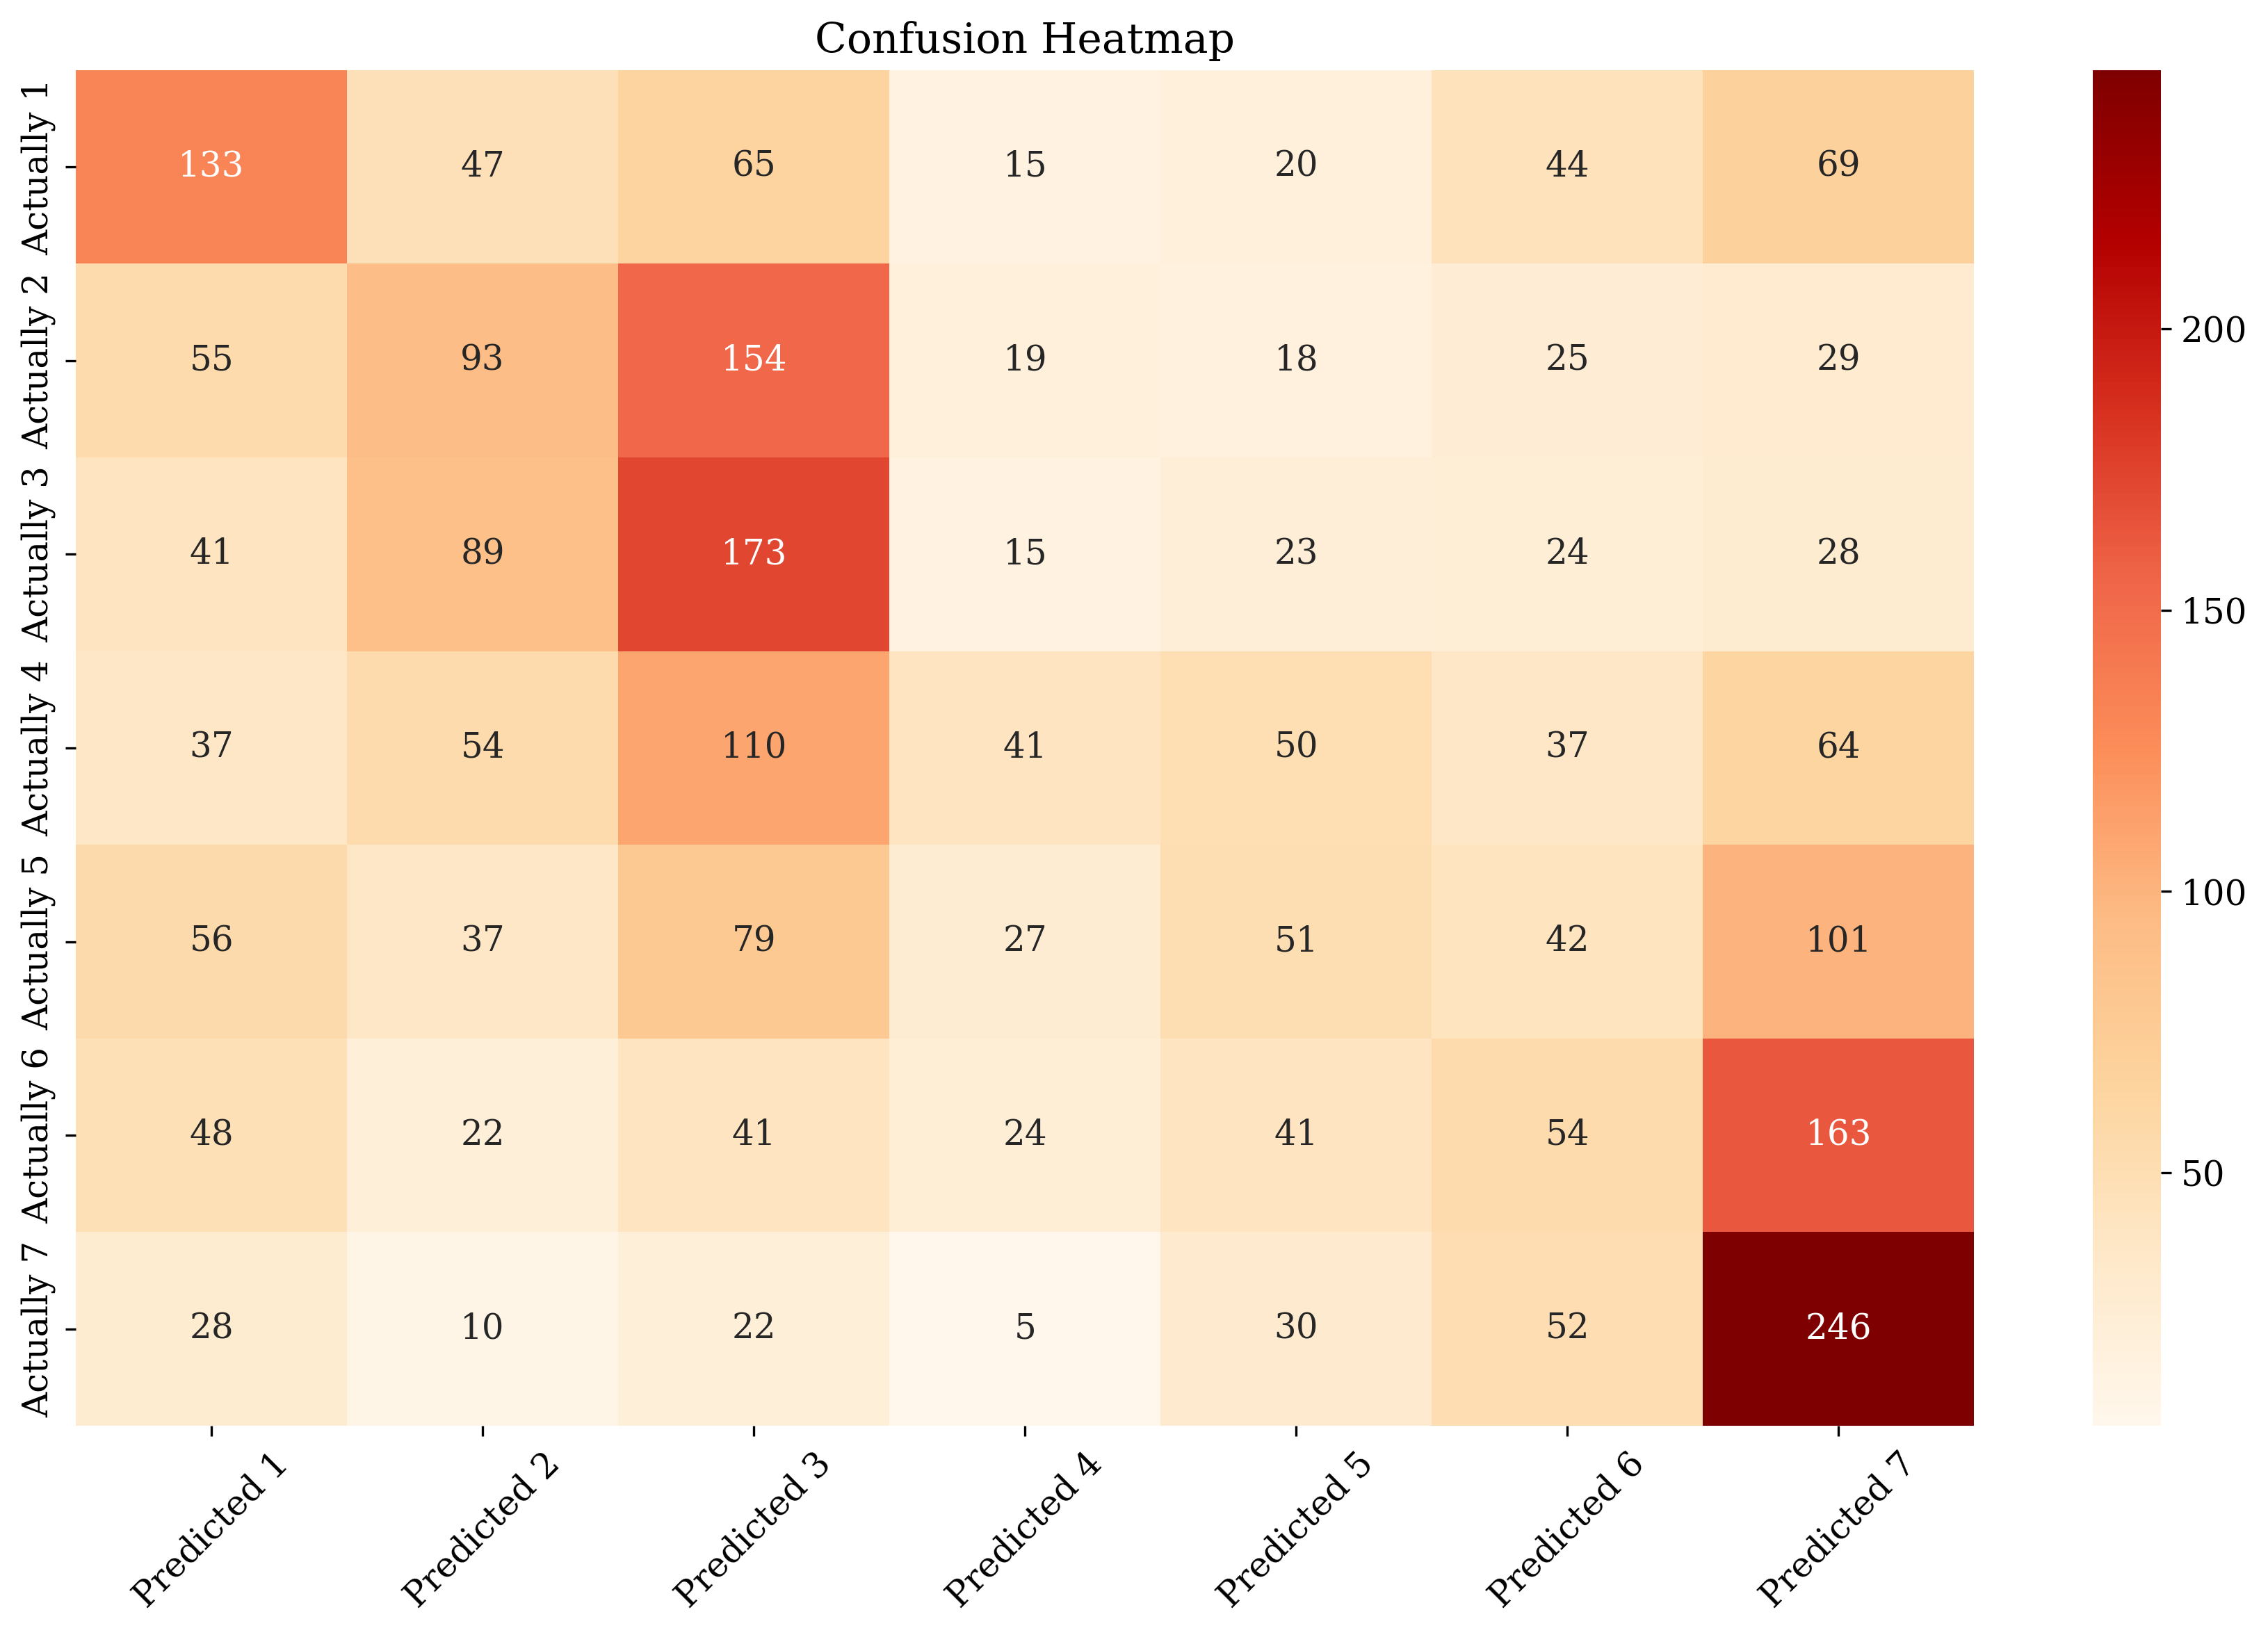

In [134]:
from sklearn.metrics import confusion_matrix

# Make classifications based on the test features, and assign the classifications to a variable
y_pred = logreg.predict(X_test_transformed)

# Build the confusion matrix as a dataframe
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
confusion_df.index = [f'Actually {i}' for i in range(1, 8)]
confusion_df.columns = [f'Predicted {i}' for i in range(1, 8)]

# Heatmap of the above
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='OrRd') # Passing in fmt='d' prevents the counts from being displayed in scientific notation
plt.xticks(rotation=45)
plt.title('Confusion Heatmap')
plt.savefig('figs/confusion_heatmap_2.jpg')
plt.show()

As we can see, before we had a better logistic regression. This is because of the fact that we had a very unevenly distributed sample. In this case, because we have a more evenly distributed sample, the model is performing worse because it has more models to choose from.

### Feature Engineering

Using L1 penalty, we should be able to find the variables that account for the changes the most.

In [139]:
log_reg_l1 = LogisticRegression(solver='liblinear', penalty='l1')
log_reg_l1.fit(X_train_transformed, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [141]:
log_reg_l1.score(X_test_transformed, y_test)

0.2857142857142857

In [146]:
c_values = [10 ** x for x in range(-3, 3)]

train_accuracies = []
validation_accuracies = []

for c in c_values:
    log_reg_l1 = LogisticRegression(solver='liblinear', penalty='l1', C=c)
    log_reg_l1.fit(X_train_transformed, y_train)
    
    train_accuracies.append(log_reg_l1.score(X_train_transformed, y_train))
    validation_accuracies.append(log_reg_l1.score(X_validation_transformed, y_validation))    

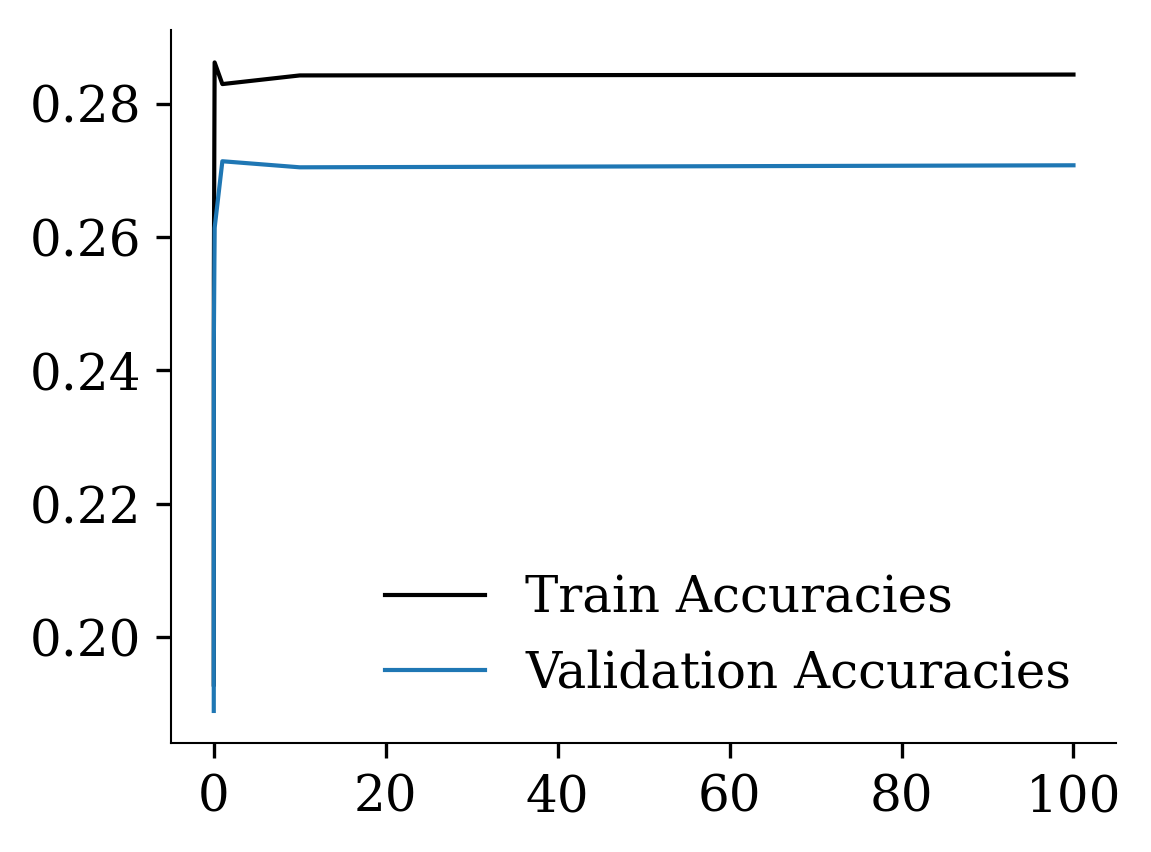

In [147]:
plt.figure(dpi=300)
sns.lineplot(x=c_values, y=train_accuracies, label='Train Accuracies')
sns.lineplot(x=c_values, y=validation_accuracies, label='Validation Accuracies')
plt.legend()
plt.show()

In [150]:
c_values[np.argmax(validation_accuracies)]

1

In [173]:
log_reg = LogisticRegression(solver='liblinear', penalty='l1', C=1000)
log_reg.fit(X_train_transformed, y_train)

LogisticRegression(C=1000, penalty='l1', solver='liblinear')

In [174]:
pd.DataFrame(log_reg.coef_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-1.274236,1.114966,-0.003390,0.163802,-0.086224,-0.151366,0.115672,-0.085989,0.338431,-0.591686,0.048938,0.144160,-0.123891,-0.019918,-0.046012,-0.050678,0.793915,1.980615,1.165606,-0.002518,0.000752,0.039858,0.001221
1,0.345993,-1.477367,-0.444562,0.100736,0.974342,-0.331796,0.024941,-0.068966,0.109532,-0.151518,-0.100407,0.230555,0.062943,-0.068609,-0.078960,-0.331313,-0.107163,-1.625057,1.998127,-0.001684,-0.003815,0.011937,0.001119
2,0.300683,-1.691007,-0.633376,-0.057833,1.398983,-0.288072,-0.026330,0.027597,-0.214876,0.296673,0.120917,-0.007407,0.052344,0.041027,0.011786,-0.504871,-0.527374,-2.463000,1.382092,0.000929,-0.004372,-0.043559,0.001050
3,0.359459,-1.178520,-0.439501,-0.030357,0.863336,0.023924,-0.025515,-0.092327,0.072666,0.097207,0.021950,-0.023828,0.013487,-0.032286,-0.019231,-0.170388,-0.121913,-1.617917,0.127658,0.001099,0.002983,0.009281,-0.002845
4,0.106796,-0.860517,-0.754145,-0.060707,0.835290,0.150784,-0.102219,-0.035294,0.076009,0.037187,-0.008131,-0.121237,0.054740,-0.022451,0.044434,-0.076042,0.197247,-1.341376,0.269673,-0.001908,-0.002038,-0.026071,-0.000775
5,0.089674,-0.302329,-0.381690,-0.090167,0.290301,0.180783,-0.033986,-0.026735,0.037008,0.038663,0.000471,-0.217363,0.061266,-0.015472,0.039509,0.252757,0.262765,-0.973237,-1.353363,0.001043,0.000565,-0.028059,-0.003029
6,1.102856,0.434728,0.748078,-0.198638,-1.222678,0.339560,0.014032,0.048237,-0.129273,0.101465,0.016823,-0.176251,-0.039209,0.045762,0.016476,0.910775,0.307649,2.651432,-3.452281,0.001021,-0.000016,-0.035782,-0.012077


## Reducing Dimensionality with PCA

In [156]:
from sklearn.decomposition import PCA

# Instantiate PCA
my_pca = PCA()

# Fit to scaled data
X_train_pca = my_pca.fit_transform(X_train_transformed)
X_validation_pca = my_pca.transform(X_validation_transformed)

In [157]:
X_train_pca.shape

(7702, 23)

In [158]:
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)
logreg.score(X_validation_pca, y_validation)

/Users/ejb/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.24227740763173833

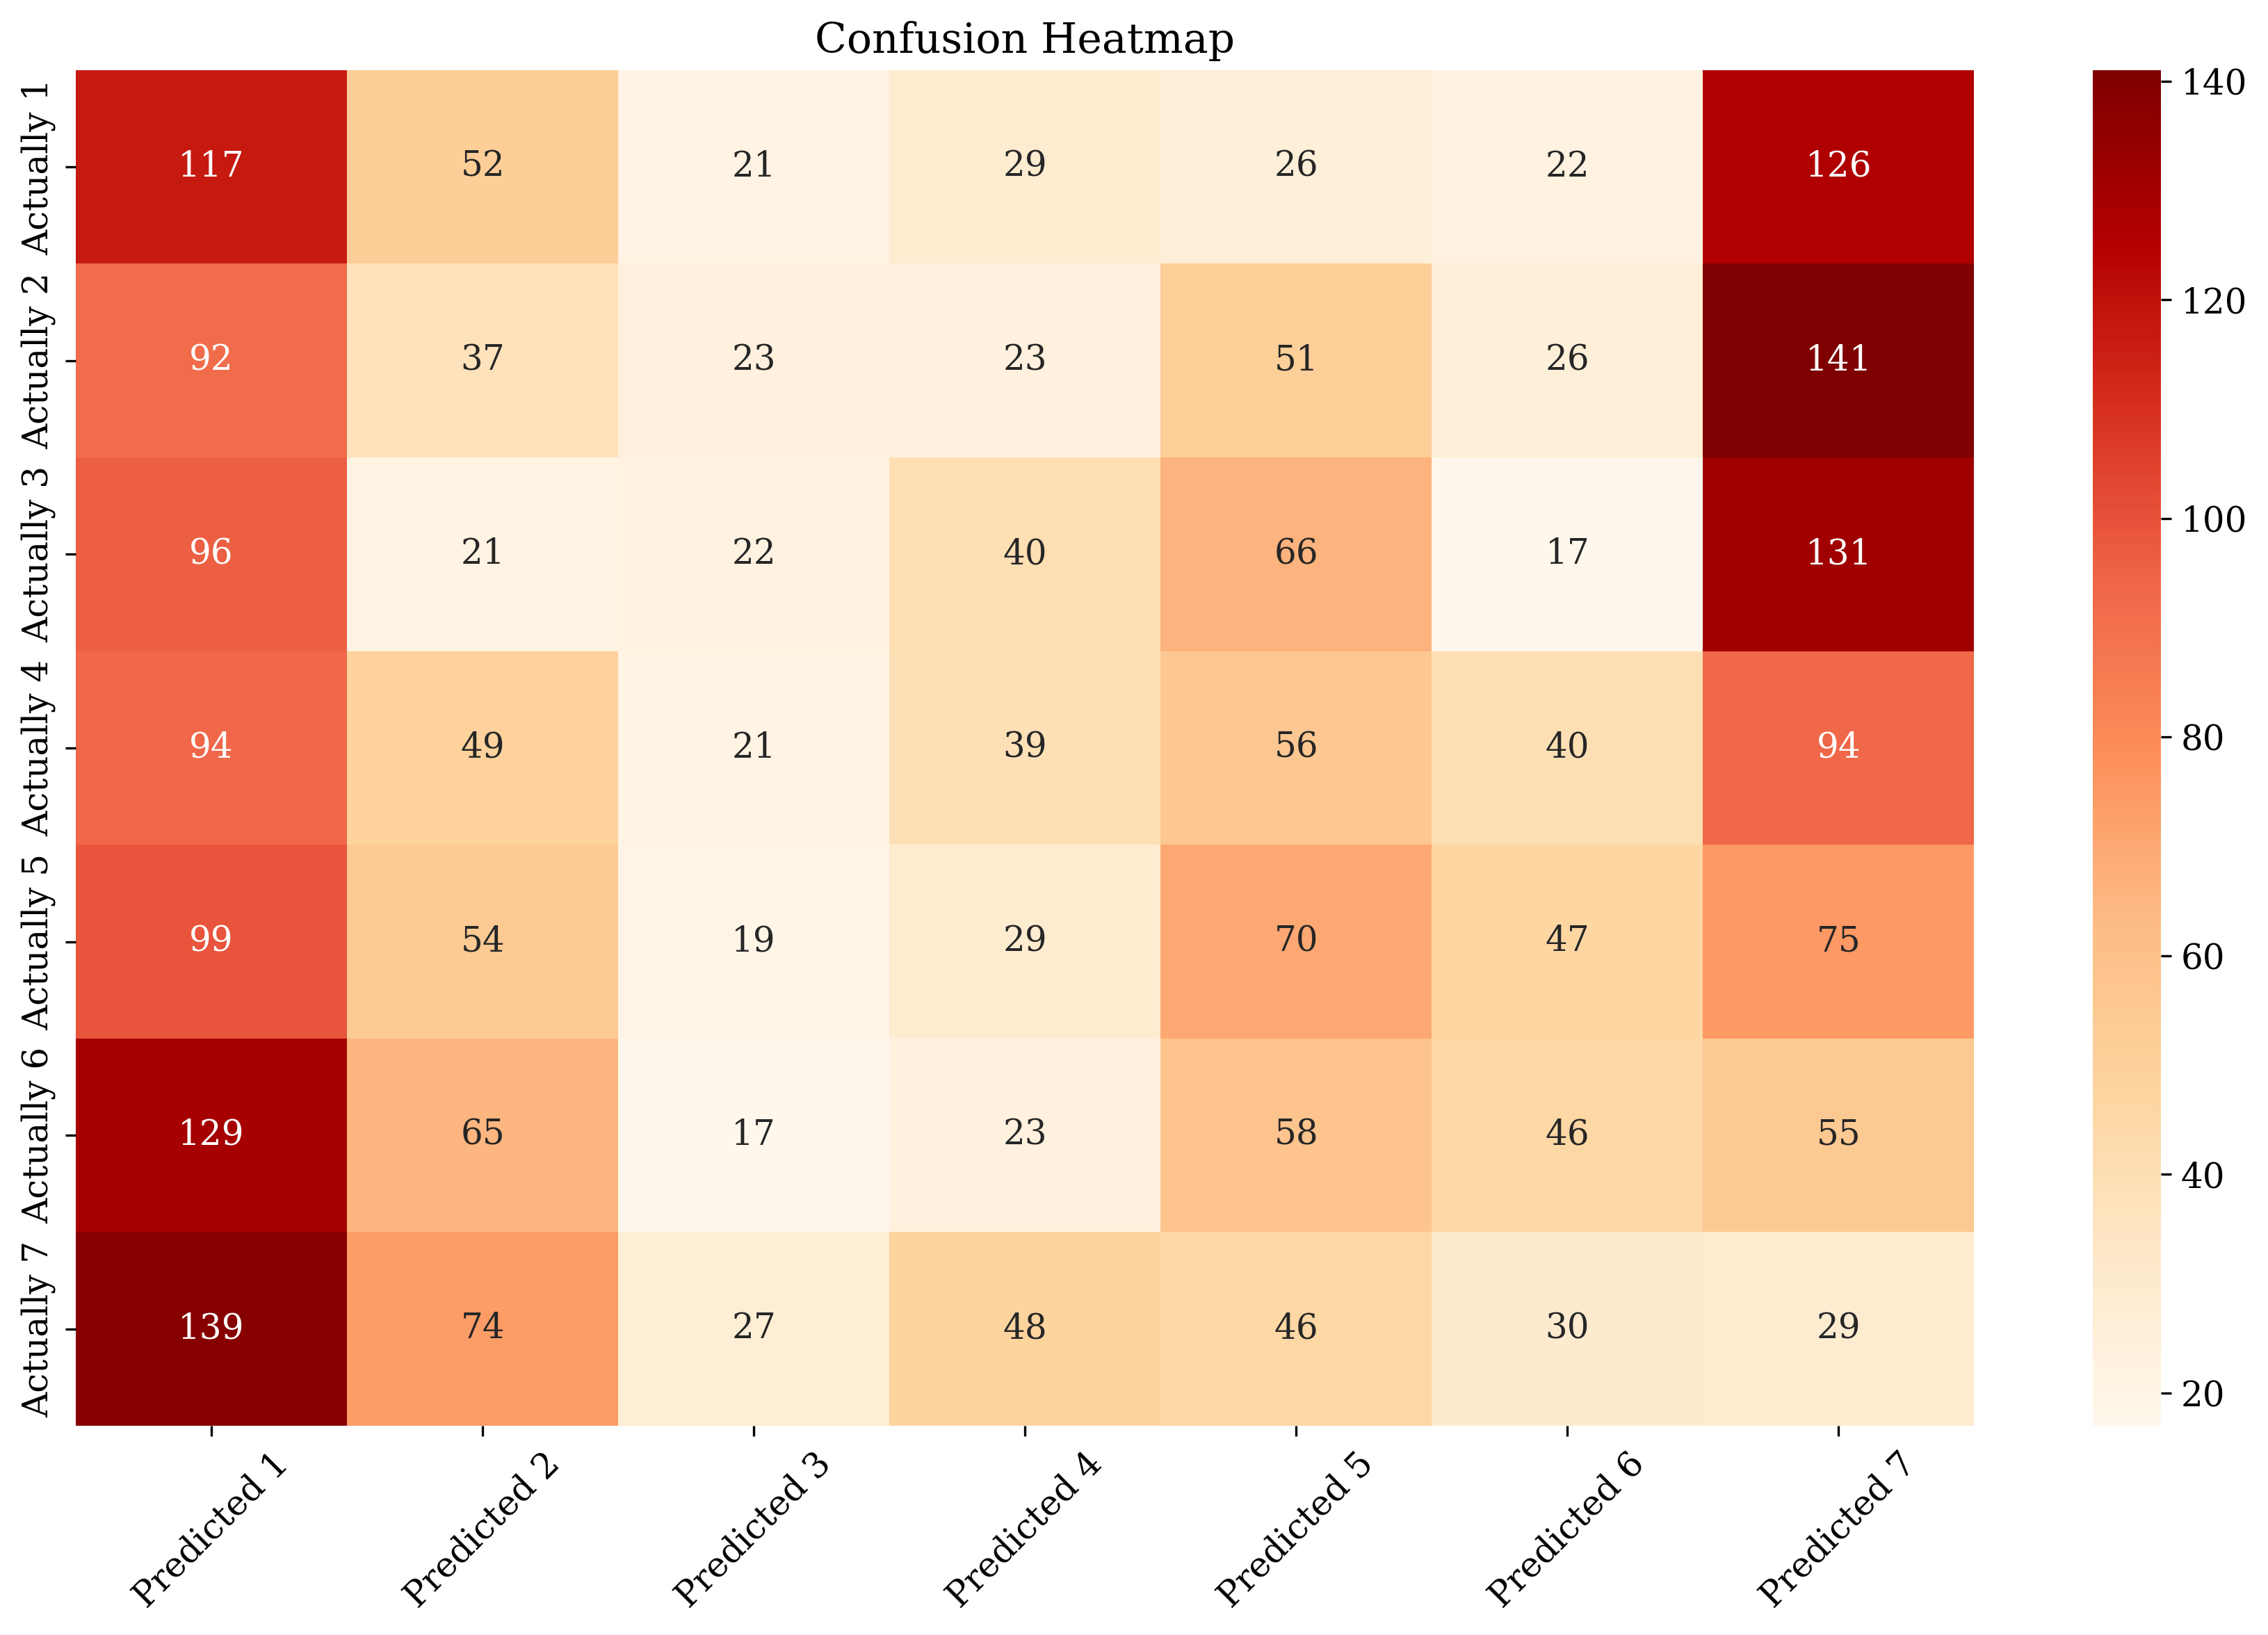

In [159]:
from sklearn.metrics import confusion_matrix

# Make classifications based on the test features, and assign the classifications to a variable
y_pred = logreg.predict(X_test_transformed)

# Build the confusion matrix as a dataframe
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
confusion_df.index = [f'Actually {i}' for i in range(1, 8)]
confusion_df.columns = [f'Predicted {i}' for i in range(1, 8)]

# Heatmap of the above
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='OrRd') # Passing in fmt='d' prevents the counts from being displayed in scientific notation
plt.xticks(rotation=45)
plt.title('Confusion Heatmap')
plt.show()

In [162]:
my_pca.explained_variance_ratio_

array([6.85116010e-01, 2.26402010e-01, 8.09290296e-02, 2.37575715e-03,
       2.00492147e-03, 8.33719279e-04, 4.36907592e-04, 3.51152482e-04,
       3.28560181e-04, 2.21669225e-04, 2.16716634e-04, 1.82949183e-04,
       1.48490367e-04, 1.33240904e-04, 1.20474367e-04, 9.79612424e-05,
       3.22967234e-05, 3.10726685e-05, 1.63413007e-05, 8.52673163e-06,
       7.02961075e-06, 2.88384788e-06, 2.27972339e-06])

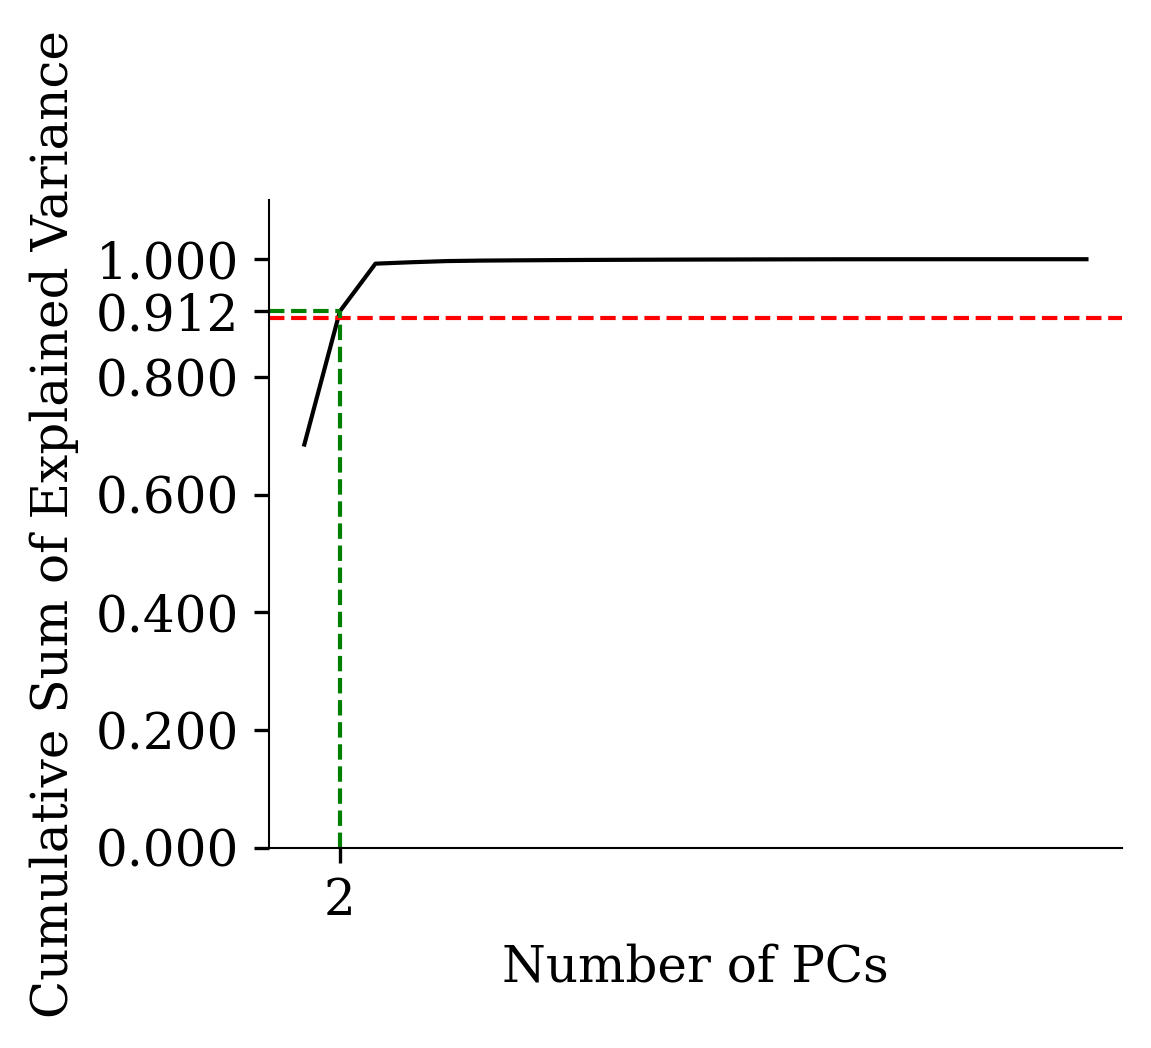

In [163]:
utils.PlotVarianceRatio(my_pca)

In [175]:
X.shape

(13755, 75)

## Creating alternative bins

In [178]:
df.head(2)

,DATE,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,tempmax,avg_tempmax,temp,avg_temp,humidity,avg_humidity,precip,avg_precip,dew,avg_dew,windspeed,avg_windspeed,winddir,avg_winddir,pressure,avg_pressure,ch4,co2,n2o,precip_variance,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_PR,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,boxcox_tempmax_variance,boxcox_temp_variance,boxcox_humidity_variance,boxcox_dew_variance,boxcox_windspeed_variance,boxcox_winddir_variance,boxcox_pressure_variance
0,1992-01-01,1992,1,0.1,A,43.325000,-101.018500,"[6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]",5.257143,"[-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]",-2.928571,"[77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]",81.142857,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,"[-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]",-6.071429,"[13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]",18.371429,"[295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]",223.500000,"[1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....",1021.671429,4.613353e-11,3.672947e-09,3.926278e-12,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.208106,1.222298,4.438154,1.969620,5.226522,63.723124,4.150127
1,1992-01-01,1992,1,1.0,B,33.058333,-79.979167,"[10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]",13.700000,"[9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]",9.885714,"[74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]",81.428571,"[4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]",4.185714,"[5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]",6.671429,"[22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]",23.514286,"[43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]",112.142857,"[1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....",1023.357143,1.795242e-11,8.400253e-07,1.743553e-11,55.589796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.651649,-0.277277,7.707836,2.368858,1.962302,168.249044,3.540947


In [179]:
utils.count_percentage_df(df['FIRE_SIZE_CLASS'])

,Count,Percentage of Total
B,10529,0.354106
A,7355,0.247360
D,2728,0.091747
E,2494,0.083877
C,2441,0.082095
F,2222,0.074729
G,1965,0.066086


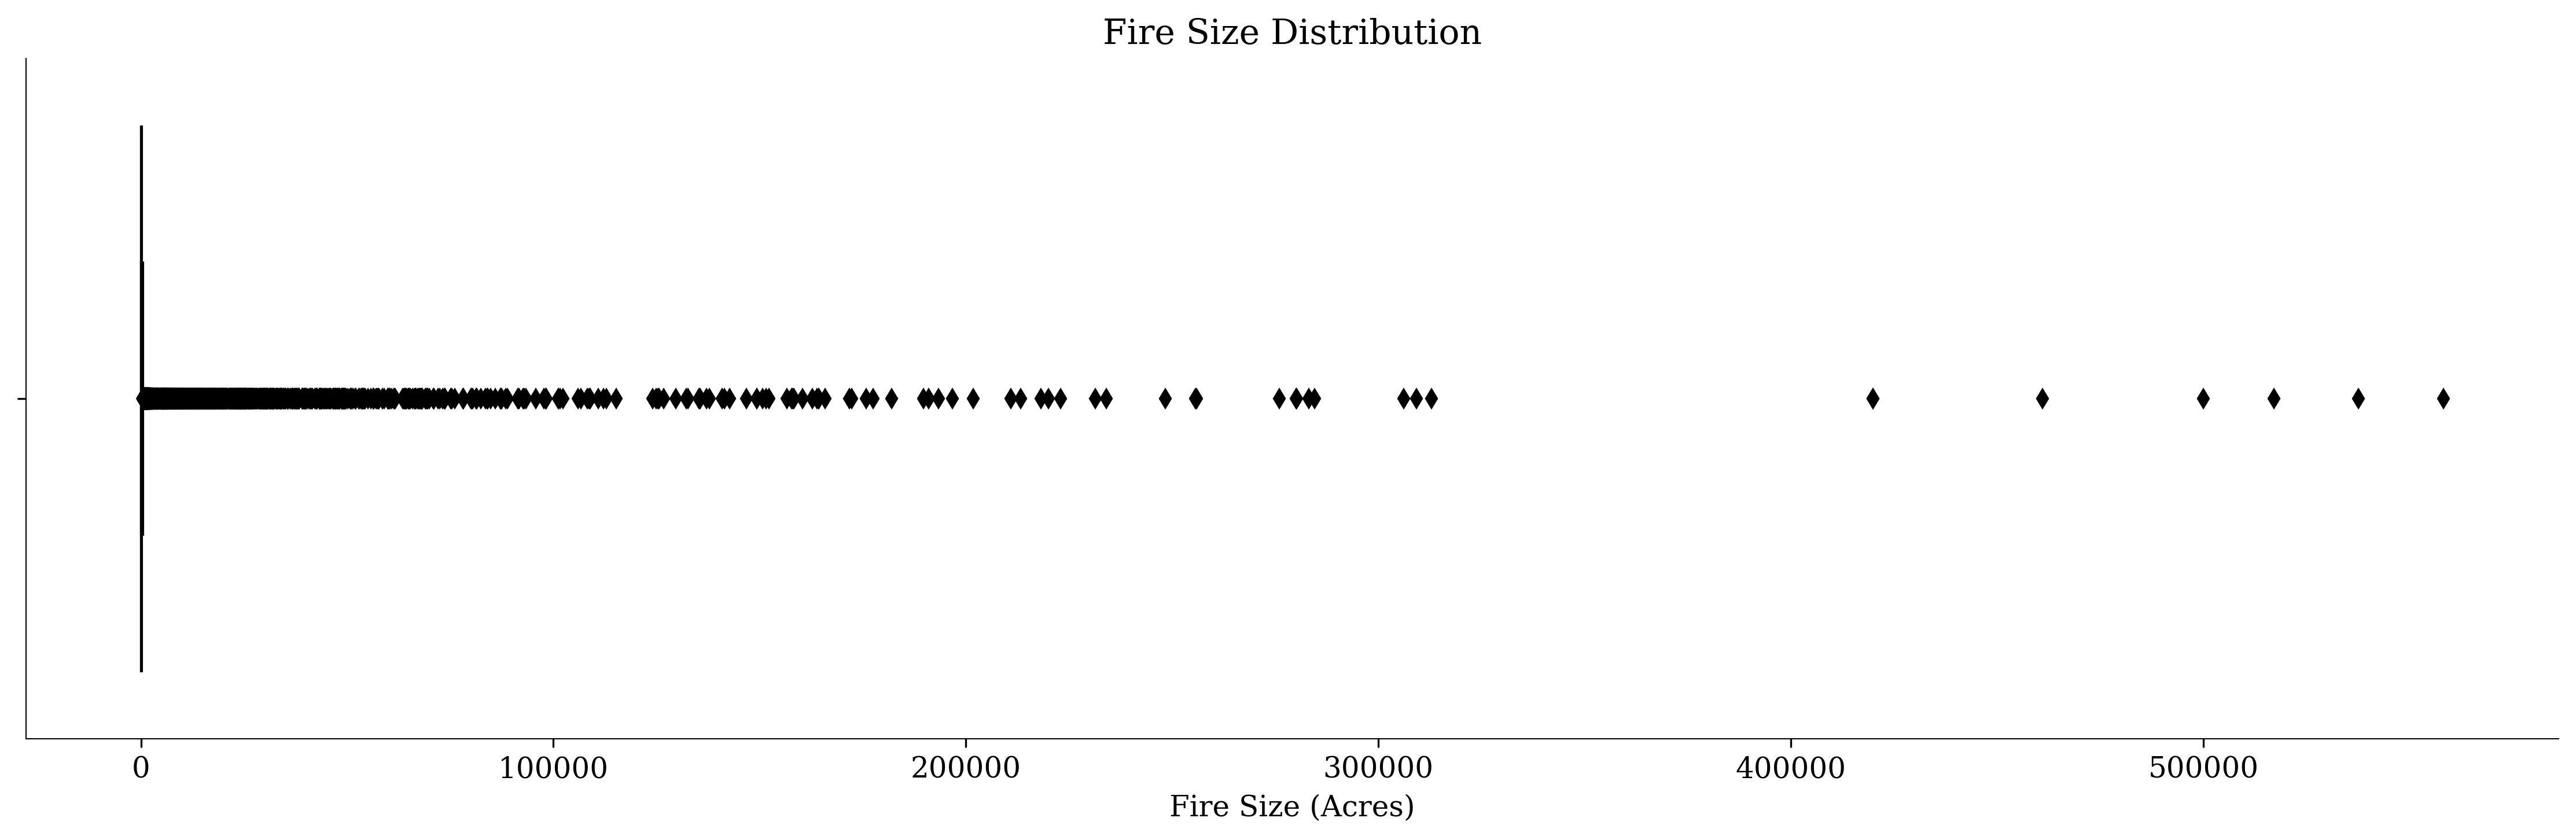

In [186]:
plt.figure(dpi=300, figsize=(15, 5))
plt.title('Fire Size Distribution')
sns.boxplot(x=df['FIRE_SIZE'])
plt.xlabel('Fire Size (Acres)')
plt.show()

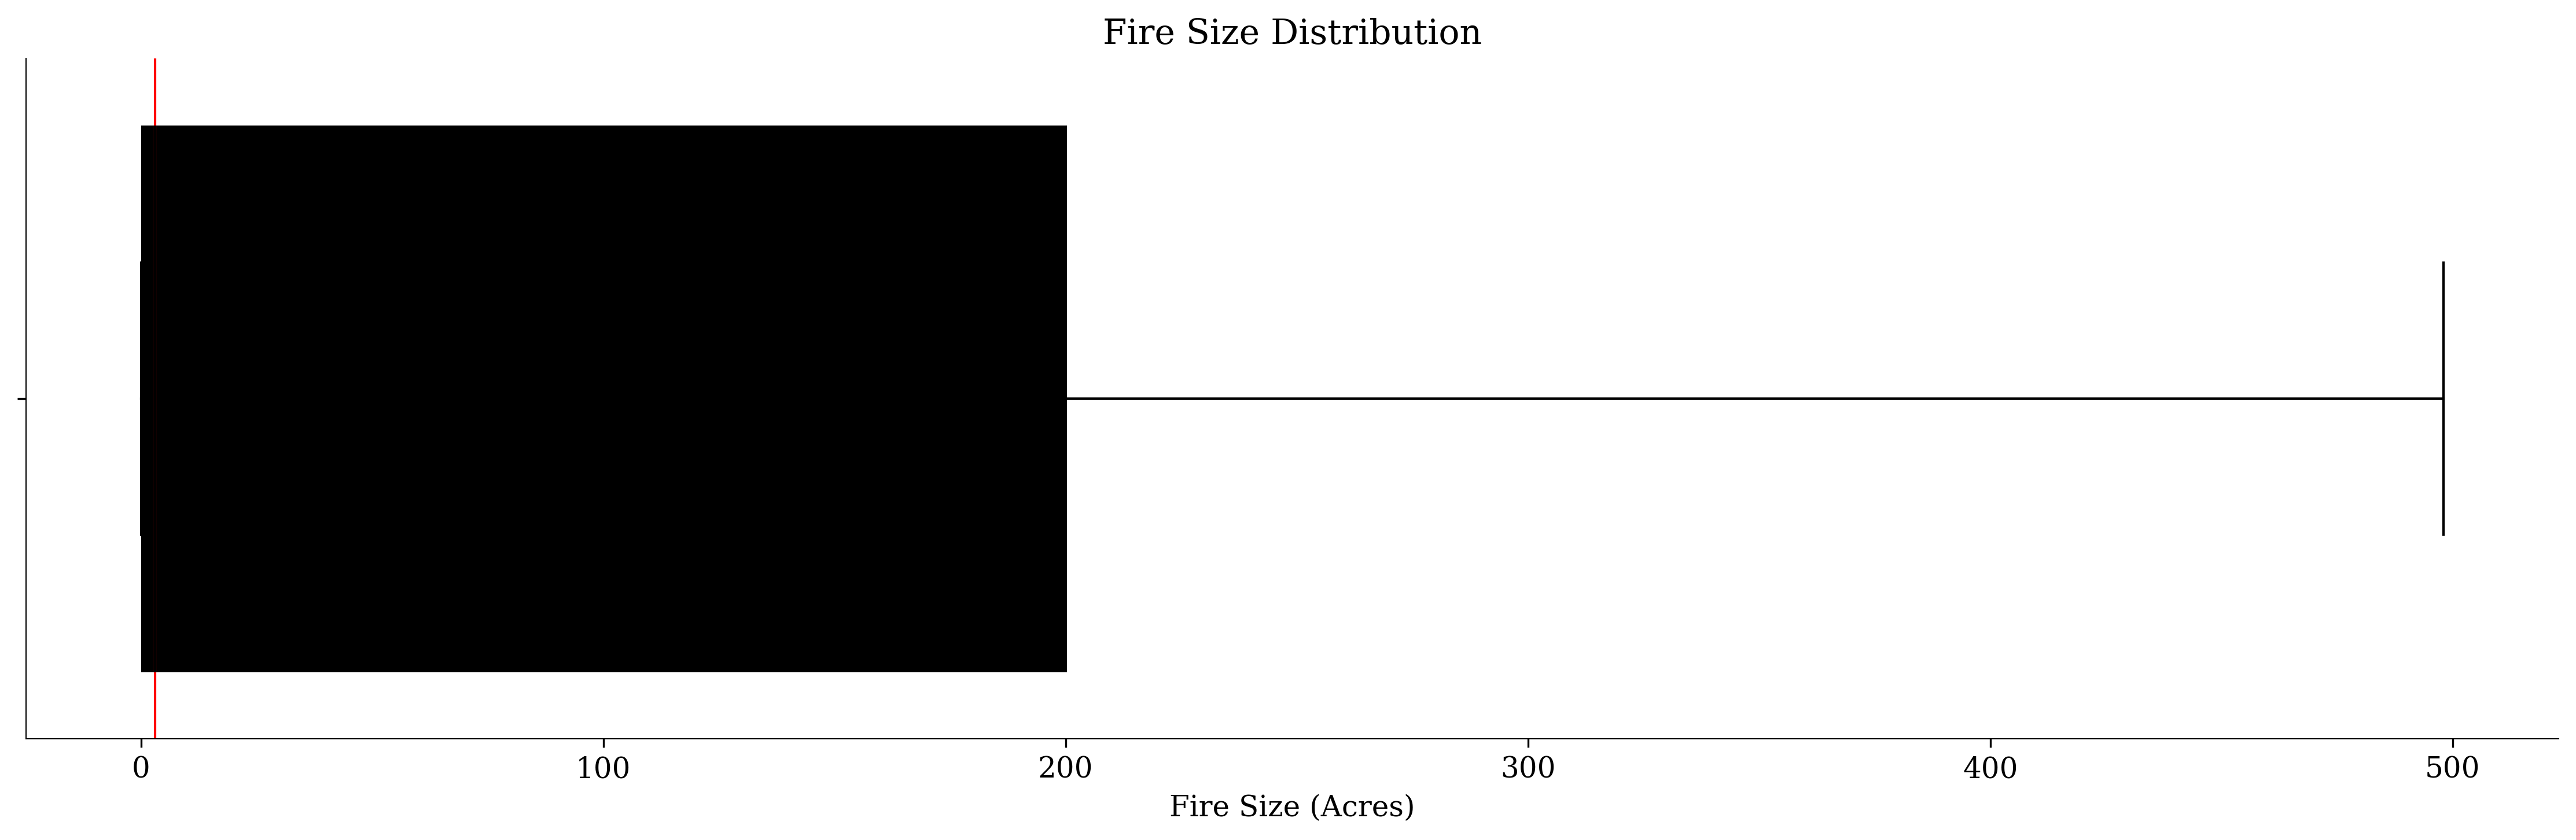

In [198]:
plt.figure(dpi=300, figsize=(15, 5))
plt.title('Fire Size Distribution')
plt.axvline(x=df['FIRE_SIZE'].median(), color='red')
sns.boxplot(x=df['FIRE_SIZE'], showfliers=False)
plt.xlabel('Fire Size (Acres)')
plt.show()

Median is incredibly low, how are we able to split these into equally sized chunks.

In [199]:
# Create new bins

# Get the number of observations
fires = df.shape[0]

# Assuming 7 bins:
fires_per_bin = fires / 7

df.sort_values(by='FIRE_SIZE')

,DATE,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,tempmax,avg_tempmax,temp,avg_temp,humidity,avg_humidity,precip,avg_precip,dew,avg_dew,windspeed,avg_windspeed,winddir,avg_winddir,pressure,avg_pressure,ch4,co2,n2o,precip_variance,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_PR,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,boxcox_tempmax_variance,boxcox_temp_variance,boxcox_humidity_variance,boxcox_dew_variance,boxcox_windspeed_variance,boxcox_winddir_variance,boxcox_pressure_variance
10923,2004-10-12,2004,286,0.001,A,41.014660,-78.244800,"[17.1, 23.8, 23.9, 20.9, 11.5, 16.1, 19.0]",18.900000,"[7.7, 12.0, 13.6, 13.6, 8.5, 7.7, 7.8]",10.128571,"[71.3, 70.6, 71.3, 79.7, 83.7, 73.1, 70.6]",74.328571,"[0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0]",0.085714,"[1.6, 5.9, 7.4, 9.9, 5.8, 2.5, 1.7]",4.971429,"[15.7, 11.5, 17.7, 21.1, 16.5, 15.5, 13.5]",15.928571,"[231.4, 225.4, 174.3, 237.5, 312.0, 336.5, 306.1]",260.457143,"[1030.4, 1031.1, 1027.0, 1019.8, 1021.1, 1021....",1023.614286,8.533647e-10,1.230022e-08,2.464934e-12,0.009796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.785265,2.269527,4.355383,2.620015,2.442394,78.158557,4.283029
14942,2010-04-29,2010,119,0.003,A,42.008208,-93.399375,"[14.3, 20.6, 13.0, 11.5, 16.4, 19.7, 27.1]",17.514286,"[12.8, 16.4, 10.8, 9.3, 11.2, 12.5, 19.6]",13.228571,"[91.5, 83.3, 87.5, 88.1, 63.8, 65.5, 58.8]",76.928571,"[9.58, 13.77, 11.29, 7.36, 0.57, 0.0, 0.0]",6.081429,"[11.4, 13.4, 8.8, 7.4, 3.8, 5.4, 11.0]",8.742857,"[29.7, 30.1, 41.5, 20.7, 21.9, 35.4, 48.4]",32.528571,"[114.0, 77.4, 353.2, 316.5, 350.2, 154.4, 166.5]",218.885714,"[1004.4, 998.8, 998.3, 1006.6, 1011.6, 1008.6,...",1003.071429,6.563183e-11,5.850533e-09,1.124329e-11,29.208784,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.477635,2.968451,8.651360,2.879040,6.374176,148.057426,4.507688
14950,2010-05-01,2010,121,0.003,A,43.818833,-71.156667,"[18.9, 18.4, 8.7, 5.6, 10.3, 20.2, 26.0]",15.442857,"[11.0, 11.7, 6.7, 3.3, 7.0, 13.5, 15.3]",9.785714,"[53.9, 60.2, 83.4, 80.8, 46.0, 27.2, 43.4]",56.414286,"[0.0, 0.0, 3.27, 7.54, 0.17, 0.0, 0.0]",1.568571,"[0.9, 3.5, 4.0, 0.3, -4.7, -5.9, 1.6]",-0.042857,"[12.8, 13.8, 13.7, 17.4, 31.0, 25.5, 8.2]",17.485714,"[55.8, 106.8, 78.0, 306.1, 295.3, 287.4, 341.5]",210.128571,"[1003.9, 995.3, 992.8, 993.8, 1001.5, 1004.4, ...",1000.157143,1.048373e-11,9.438931e-09,1.596714e-12,7.192927,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.712013,3.509981,10.945826,3.216084,5.499195,155.124359,4.391748
14865,2010-04-13,2010,103,0.005,A,43.126933,-72.328217,"[28.7, 19.5, 8.9, 13.2, 16.7, 12.3, 14.2]",16.214286,"[16.0, 14.1, 7.6, 7.0, 10.6, 6.1, 5.7]",9.585714,"[68.9, 74.4, 81.9, 42.0, 44.4, 57.1, 55.6]",60.614286,"[1.09, 0.0, 5.56, 0.0, 0.0, 0.0, 0.0]",0.950000,"[8.7, 9.3, 4.6, -5.6, -2.1, -3.2, -4.6]",1.014286,"[22.6, 19.9, 19.2, 25.7, 22.5, 23.5, 12.5]",20.842857,"[278.3, 90.3, 331.5, 277.0, 286.5, 326.2, 18.7]",229.785714,"[1004.7, 1007.8, 1005.9, 1015.2, 1020.0, 1026....",1016.000000,1.692512e-11,8.604198e-09,1.704688e-12,3.683457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.170039,3.383789,9.176268,4.964031,3.412484,154.976365,6.097563
14420,2009-09-07,2009,250,0.010,A,31.478397,-95.468914,"[30.4, 31.2, 32.6, 27.7, 31.9, 33.8, 33.9]",31.642857,"[24.5, 24.7, 25.4, 23.7, 25.3, 26.7, 27.6]",25.414286,"[61.2, 61.6, 67.9, 82.7, 76.0, 71.4, 64.8]",69.371429,"[0.0, 0.0, 0.54, 1.0, 0.0, 0.0, 0.0]",0